In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Housing.csv')
print(df.head())
df.head(10)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
columns_to_remove = ['mainroad',
                     'guestroom',
                     'basement',
                     'hotwaterheating',
                     'airconditioning',
                     'prefarea',
                     'furnishingstatus']
df = df.drop(columns=columns_to_remove)


In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2
6,10150000,8580,4,3,4,2
7,10150000,16200,5,3,2,0
8,9870000,8100,4,1,2,2
9,9800000,5750,3,2,4,1


In [ ]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
print(df.isnull().sum())

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


In [ ]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

Mean Squared Error: 2292721545725.3623
R-squared: 0.5464062355495871


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2292721545725.3623
R-squared: 0.5464062355495871


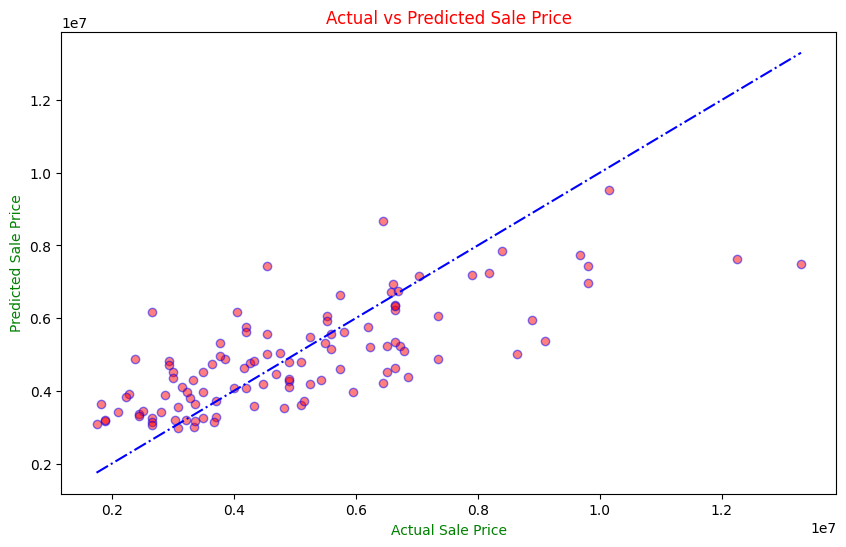

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Actual Sale Price', color='green')
plt.ylabel('Predicted Sale Price', color='green')
plt.title('Actual vs Predicted Sale Price', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b-.')
plt.show()

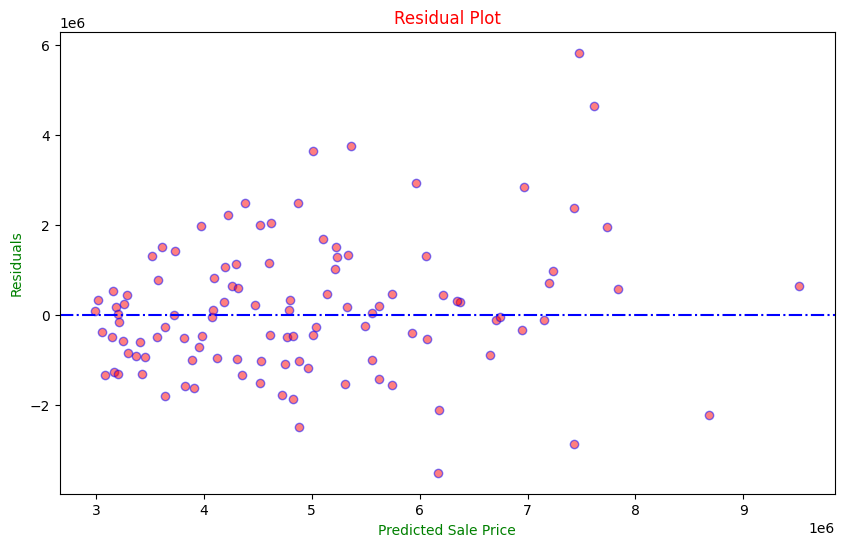

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='r', edgecolors='b')
plt.xlabel('Predicted Sale Price', color='green')
plt.ylabel('Residuals', color='green')
plt.title('Residual Plot', color='red')
plt.axhline(y=0, color='b', linestyle='-.')
plt.show()

<Figure size 1200x800 with 0 Axes>

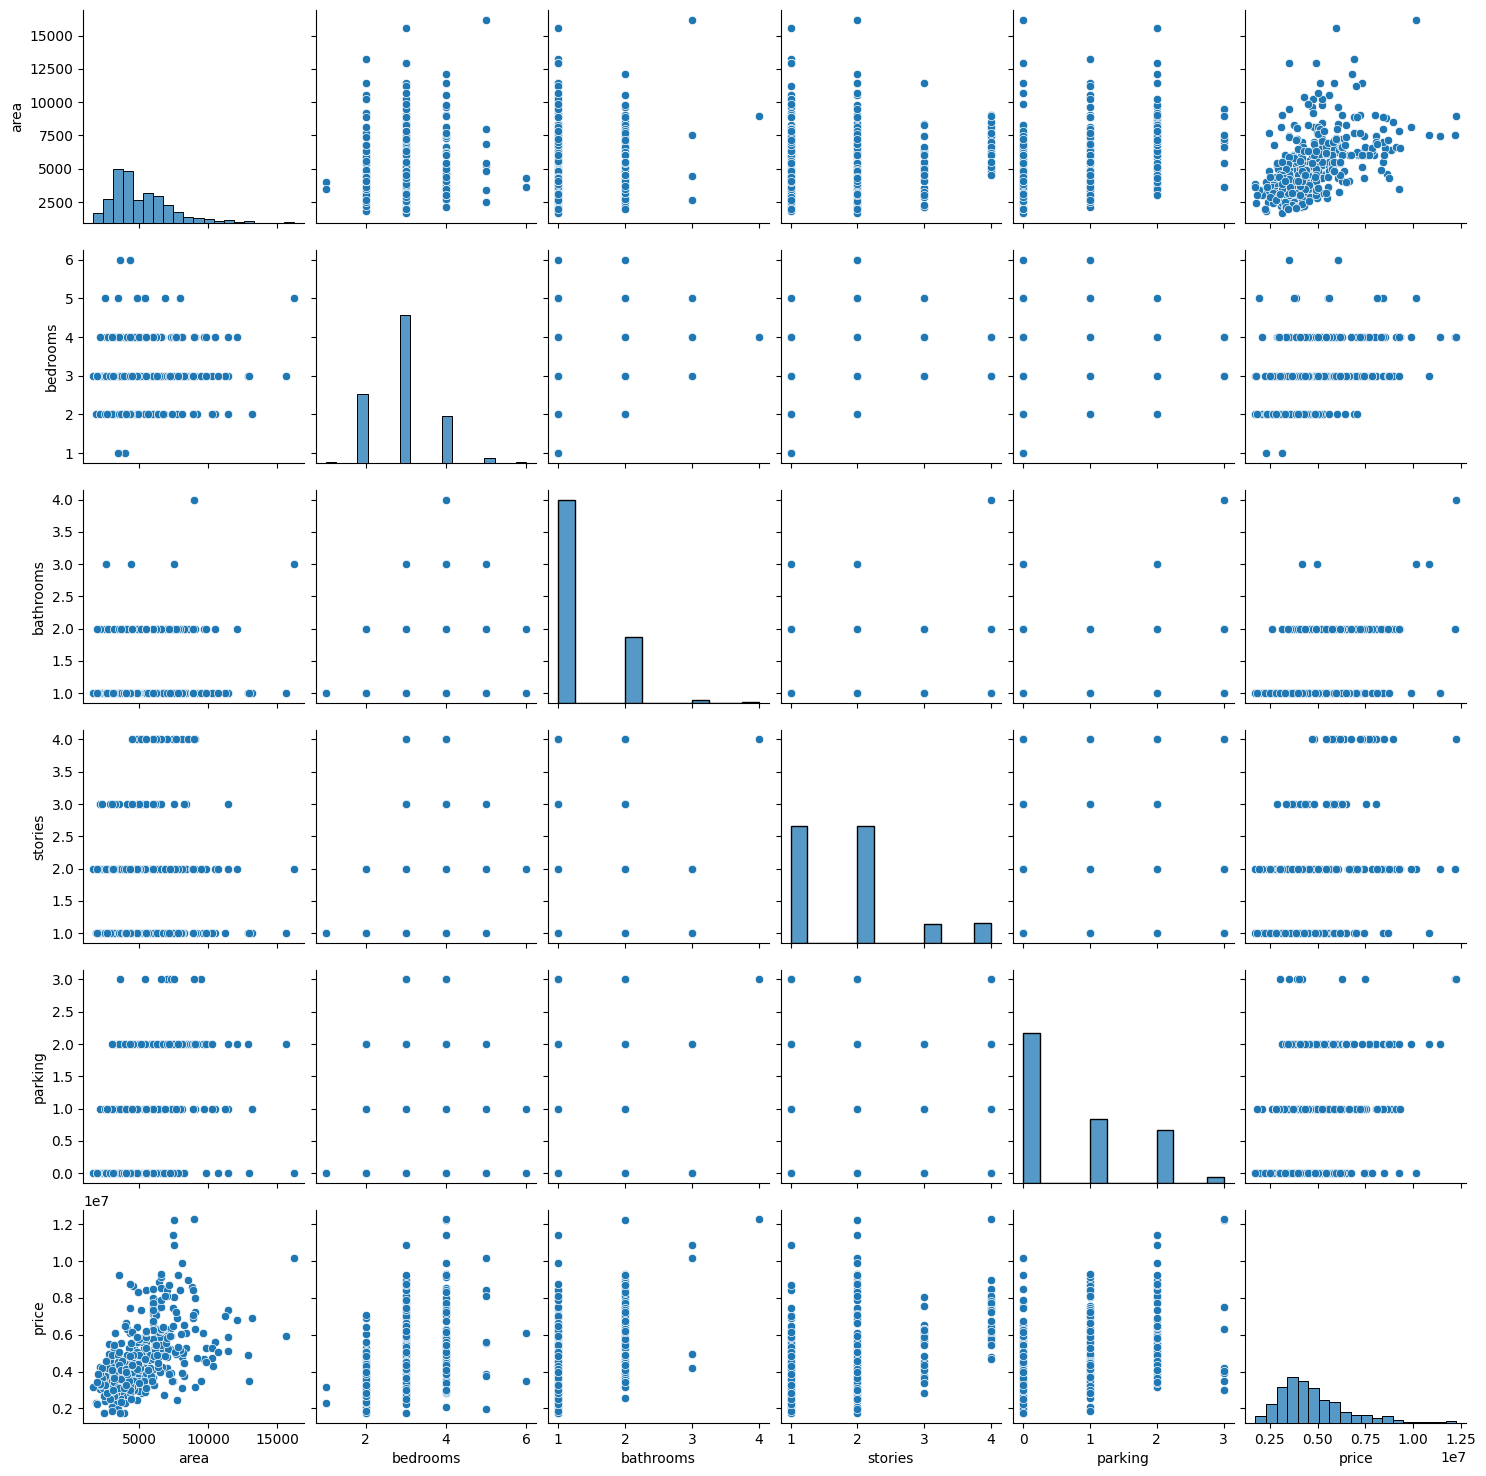

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(pd.concat([X_train, y_train], axis=1))
plt.show()

In [ ]:
new_data = [[6800, 3, 1, 4, 1]]
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)
predicted_price = model.predict(new_data_df)
print("Predicted Price:", predicted_price[0])

Predicted Price: 6109830.824739847
